# Proyecto II
## Predicción de deserción de clientes
### Elaborado por: Martín Ordóñez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Modelo_churn/Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No hay datos faltantes 

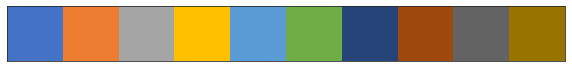

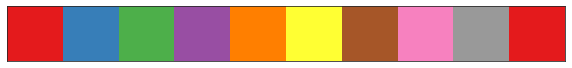

In [5]:
# Estilo de graficos
sns.set_style('white')
csfont = {'fontname':'Calibri'} # Fuente a utilizar

# Paleta de colores
my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('Set1', 10)
sns.palplot(sns.color_palette(my_palette, 10))
sns.palplot(sns.color_palette('Set1', 10))

# Define palette
sns.set_palette(my_palette2)

In [8]:
np.unique(df['Churn'])

array(['No', 'Yes'], dtype=object)

In [9]:
Weight_order_map = {'No': 0, 'Yes': 1}
df['Churn_label'] = df['Churn'].map(Weight_order_map)
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [12]:
# Ver estadistica descriptiva de variables de acuerdo a 'Churn'
df.groupby(['Churn']).agg({'MonthlyCharges': ['mean', 'min', 'max']})

MonthlyCharges               
                mean    min     max
Churn                              
No         61.265124  18.25  118.75
Yes        74.441332  18.85  118.35

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

La mayoría de gente No ha desertado

In [14]:
# Proporcion de clientes por 'Churn'
round(df['Churn'].value_counts()/df.shape[0] * 100, 2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

Text(0.5, 1.0, 'MonthlyCharges')

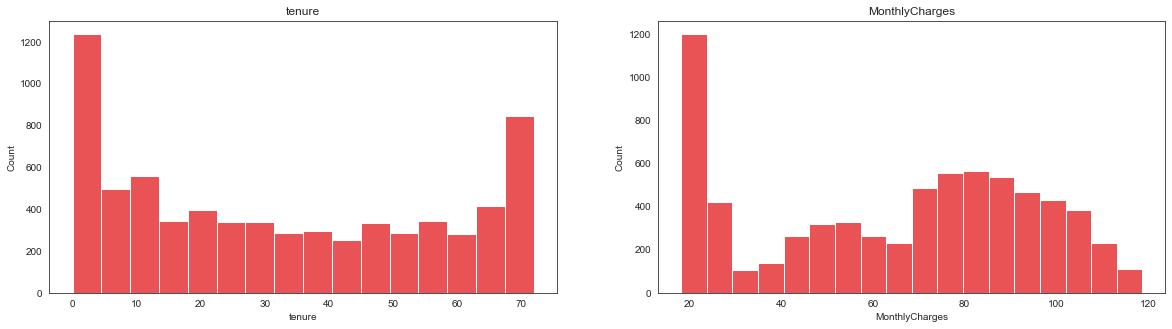

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['tenure'], ax=axes[0])
axes[0].set_title('tenure')

sns.histplot(df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('MonthlyCharges')

In [17]:
df1=df.groupby(['Churn'])[['MonthlyCharges']].sum()
df1=df1.reset_index()
df1.head()

,Churn,MonthlyCharges
0,No,316985.75
1,Yes,139130.85


TypeError: can only concatenate str (not "int") to str

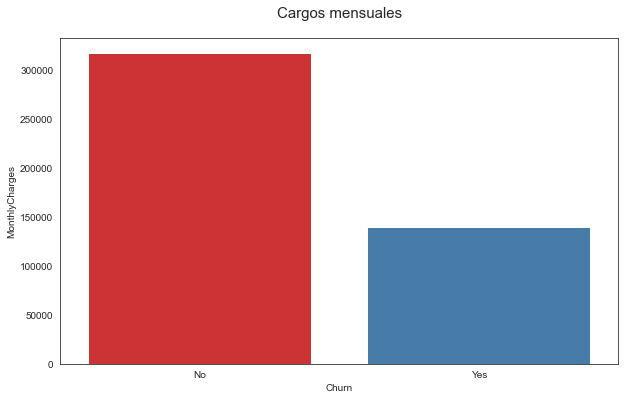

In [22]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df1, x='Churn', y='MonthlyCharges')
plt.title('Cargos mensuales', fontsize=15, pad=20)
plt.ylabel('MonthlyCharges')
plt.yticks(np.arange(0, max(df1)+1, 10000), fontsize=12)
plt.xlabel('Churn', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())

In [26]:
df2=df.groupby(['gender'])[['MonthlyCharges']].sum()
df2=df2.reset_index()
df2.head()

,gender,MonthlyCharges
0,Female,227432.4
1,Male,228684.2


[Text(0, 0.0, '0'),
 Text(0, 20000.0, '20,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 120000.0, '120,000'),
 Text(0, 140000.0, '140,000'),
 Text(0, 160000.0, '160,000'),
 Text(0, 180000.0, '180,000'),
 Text(0, 200000.0, '200,000'),
 Text(0, 220000.0, '220,000')]

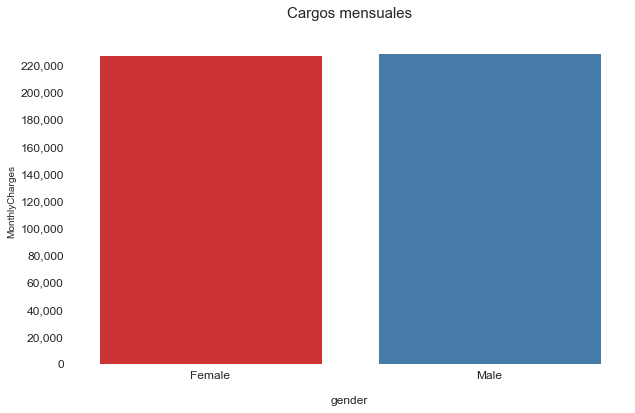

In [31]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df2, x='gender', y='MonthlyCharges')
plt.title('Cargos mensuales', fontsize=15, pad=20)
plt.ylabel('MonthlyCharges')
plt.yticks(np.arange(0, max(df2['MonthlyCharges'])+1, 20000), fontsize=12)
plt.xlabel('gender', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())